# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [63]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from scipy.spatial.distance import cdist
from sklearn import mixture


from sklearn.preprocessing import StandardScaler


Load feature names.

In [52]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [53]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [54]:
def P1():
### STUDENT START ###

    pca = PCA(n_components=50)
    train_sklearn = pca.fit_transform(train_data)

    print("Fraction of total variance for K in 1,50: \n", pca.explained_variance_ratio_)

### STUDENT END ###

P1()

Fraction of total variance for K in 1,50: 
 [ 0.16404331  0.13323479  0.10173457  0.07063356  0.03866646  0.03680804
  0.03128239  0.02733737  0.0261649   0.02230943  0.02048173  0.01868331
  0.01734422  0.01684361  0.01518819  0.01508618  0.01429134  0.01412013
  0.01325045  0.01146379  0.01071066  0.01065747  0.01040967  0.00993699
  0.0090807   0.00869326  0.00795617  0.00775825  0.0073757   0.00700276
  0.00641233  0.00614513  0.00572345  0.00533629  0.00525936  0.00502674
  0.00499042  0.00455942  0.00452784  0.00439788  0.00419489  0.00397702
  0.00370043  0.00359528  0.00338124  0.00298987  0.0027203   0.00235705
  0.00221399  0.00204448]


(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

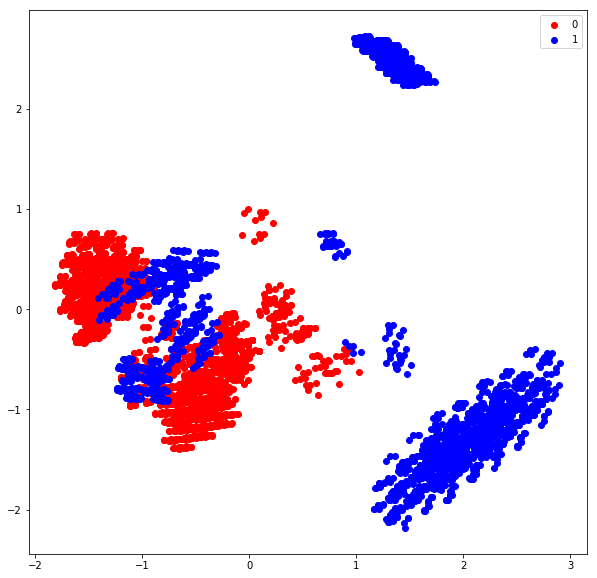

In [55]:
def P2():
### STUDENT START ###
   
    pca = PCA(n_components=2)
    train_sklearn = pca.fit_transform(train_data)
    
    
    plt.figure(figsize=(10, 10))
    for label, color in zip((0, 1),
                        ('red', 'blue')):
        plt.scatter(train_sklearn[train_labels==label, 0],
                    train_sklearn[train_labels==label, 1],
                    label=label,
                    c=color)

    plt.legend()
    plt.show()
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

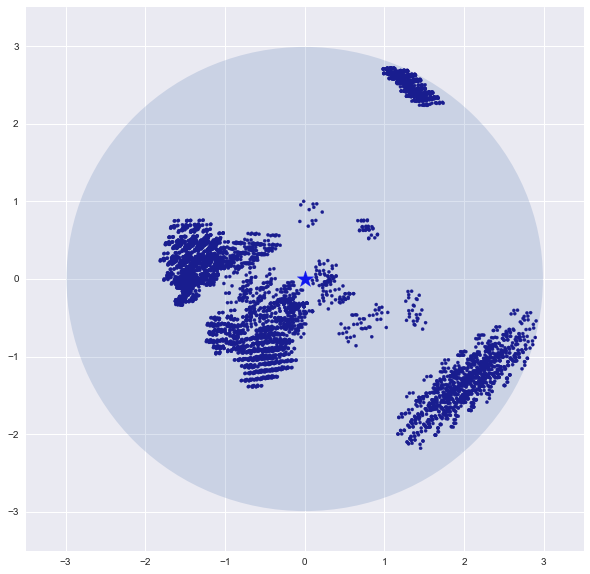

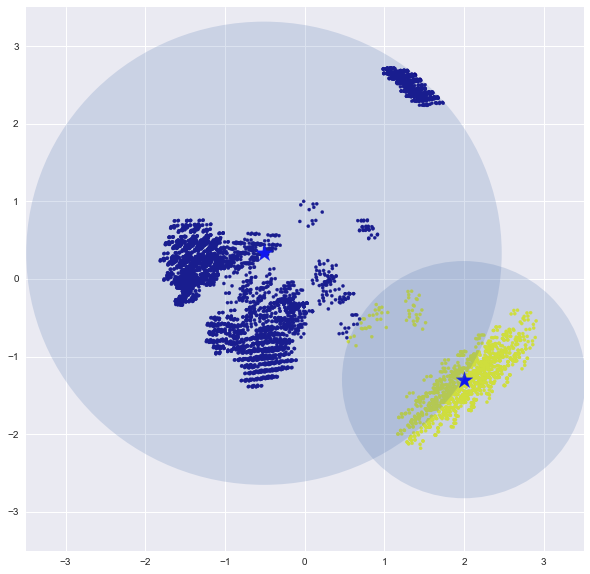

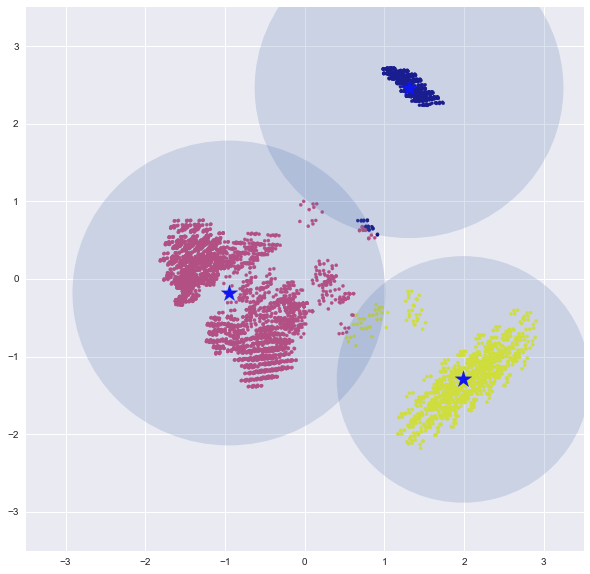

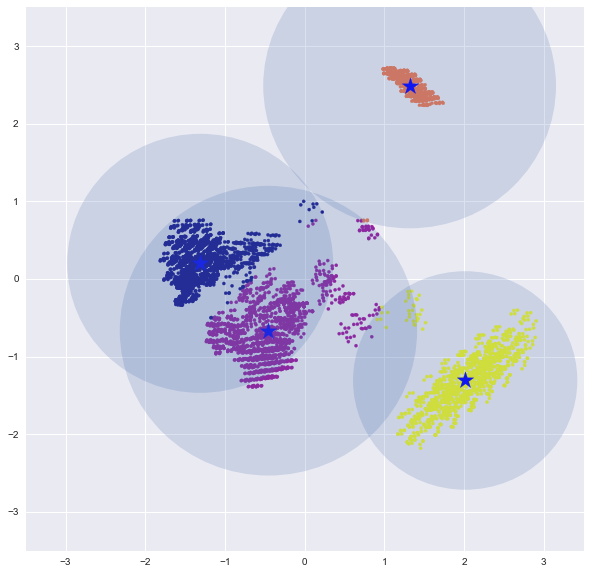

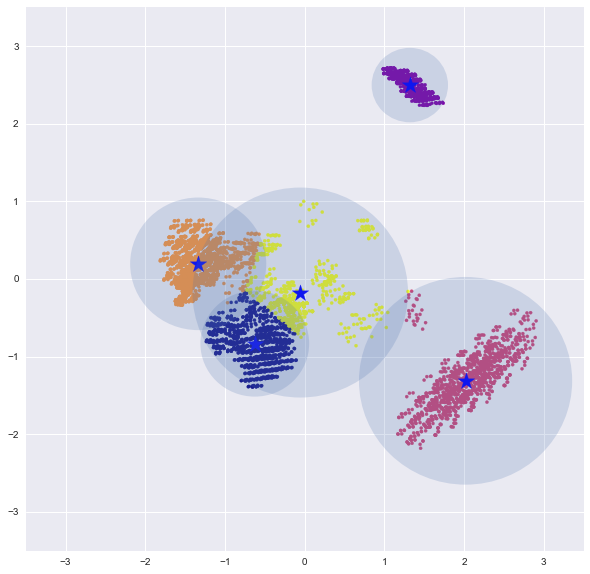

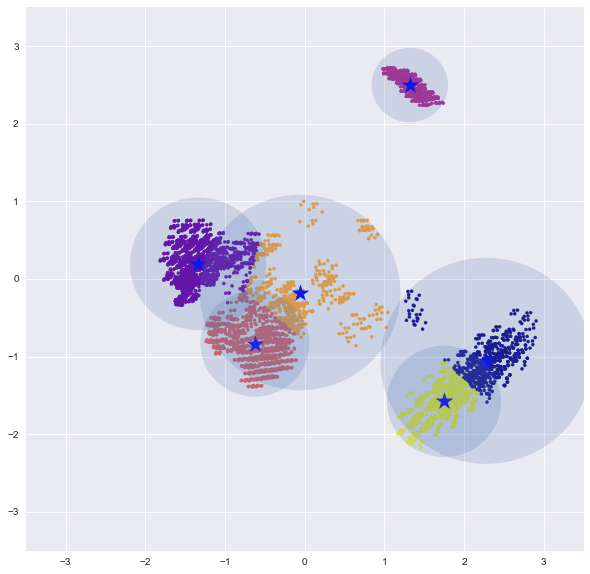

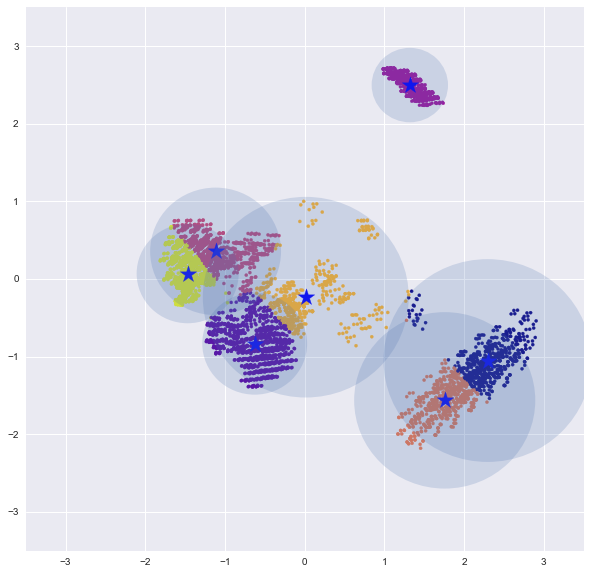

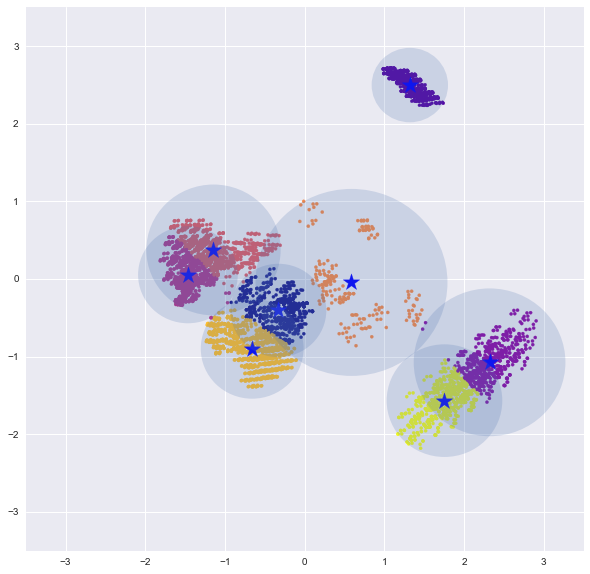

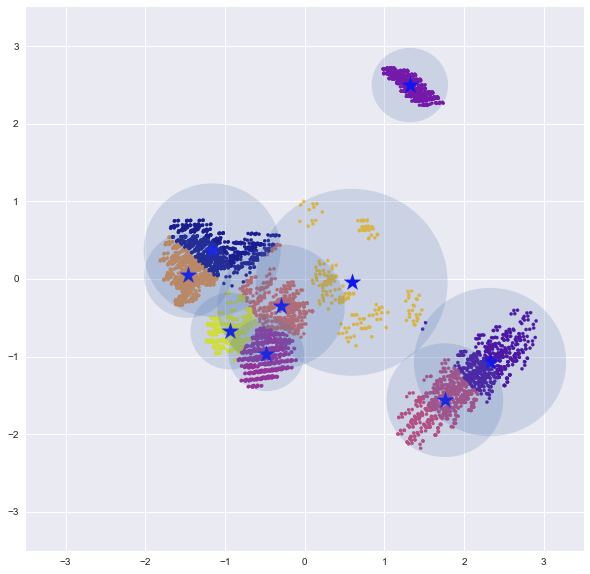

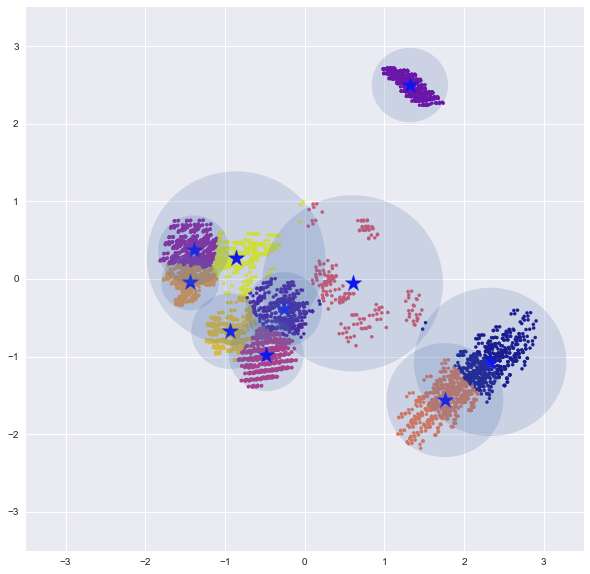

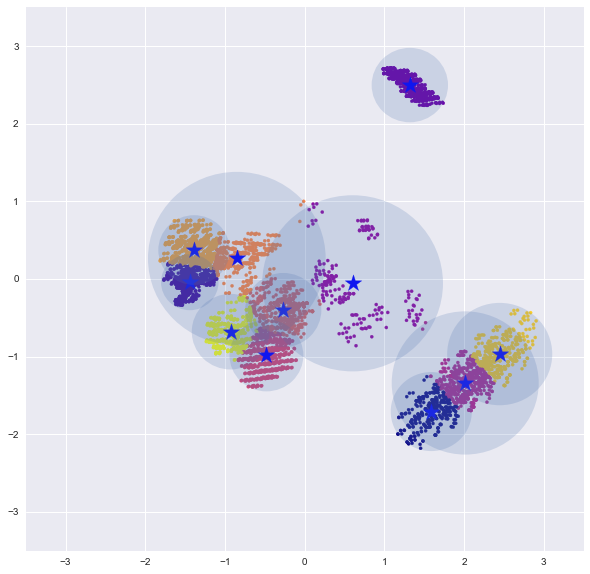

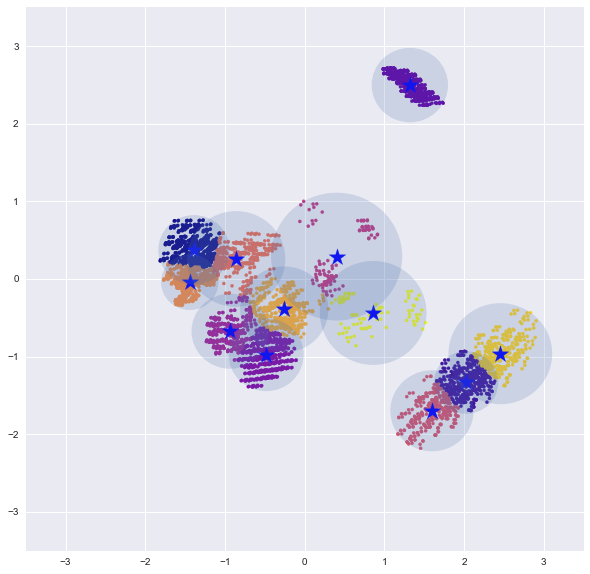

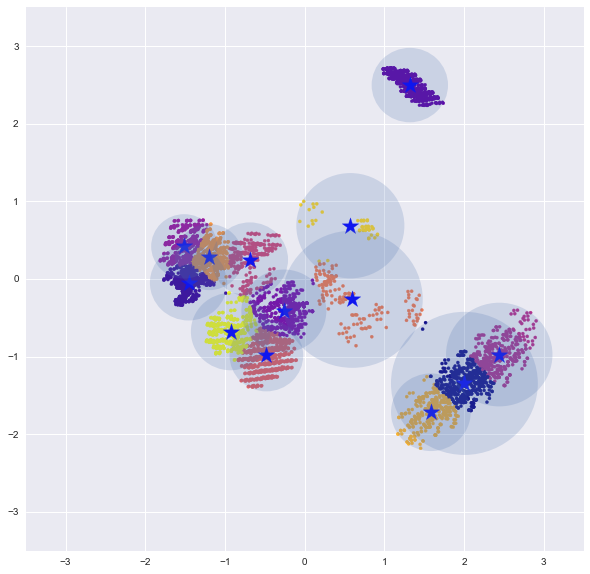

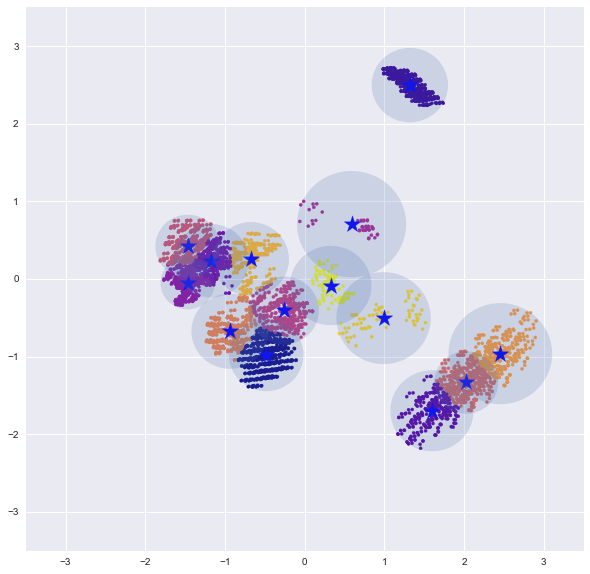

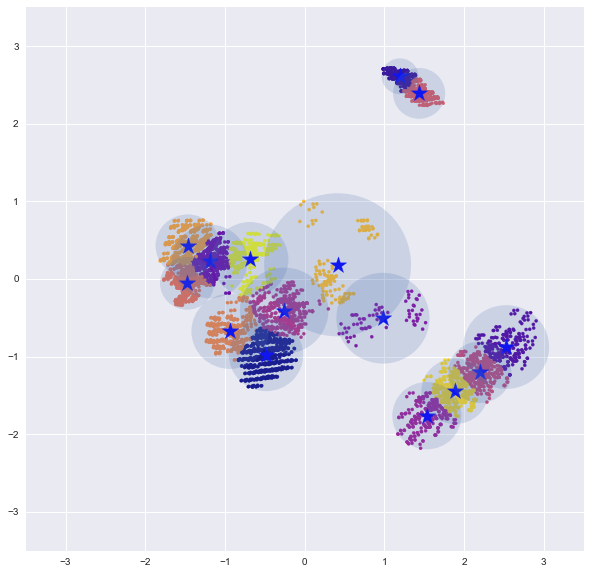

In [107]:
def P3():
    
### STUDENT START ###
   
    #setup 2 dimension PCA data 
    pca = PCA(n_components=2)
    train_2d = pca.fit_transform(train_data)
    
    #loop through k amount of centroids 
    k = range(1,16)
    for i in k:

        #set kmeans classifier and fit it 
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(train_2d)
        pred_labels = kmeans.predict(train_2d)
       
        #setup circles 
        centroid = kmeans.cluster_centers_
        radii = [cdist(train_2d[pred_labels == i], [centroid]).max() for i, centroid in enumerate(centroid)]
    
        #plot data, circles, and centroids 
        plt.figure(figsize=(10, 10))
        plt.xlim(-3.5, 3.5)
        plt.ylim(-3.5, 3.5)
        ax = plt.gca()
        
        for center, radius in zip(centroid, radii):
            ax.add_patch(plt.Circle(center, radius, alpha=0.2)) 

        
        ax.scatter(train_2d[:, 0], train_2d[:, 1], c=pred_labels, s=10, cmap='plasma')
        ax.scatter(centroid[:, 0], centroid[:, 1], marker = "*", c='b', s=300)
            

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

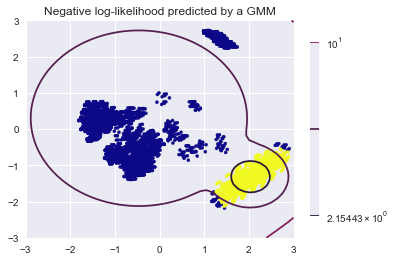

/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


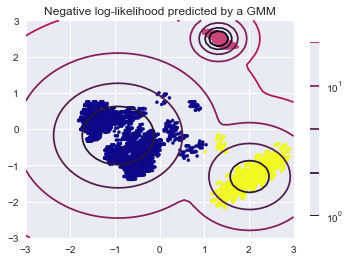

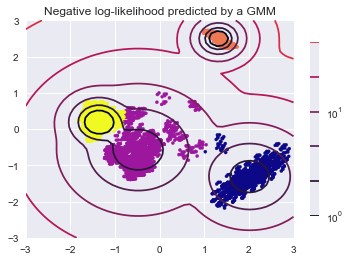

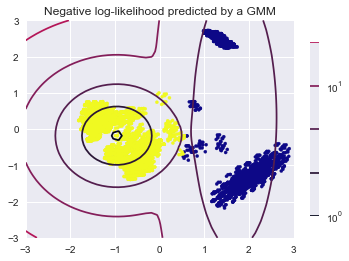

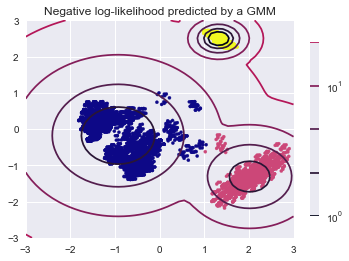

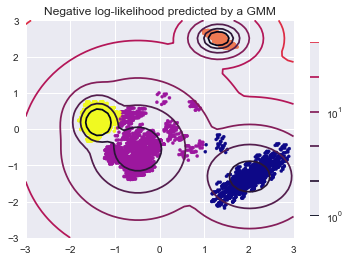

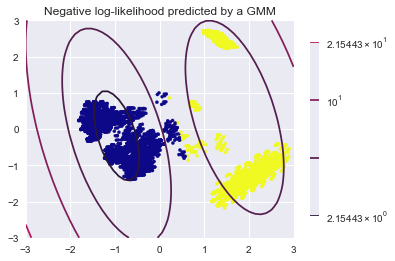

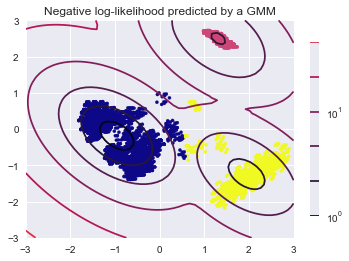

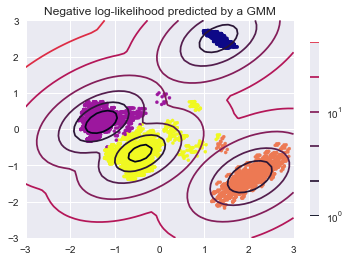

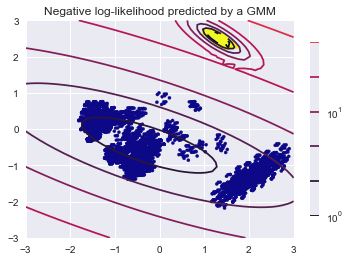

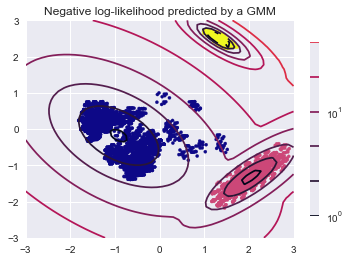

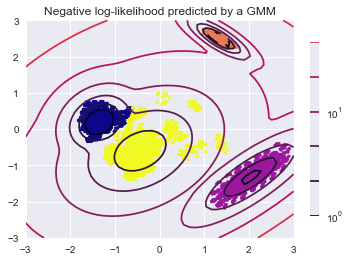

In [108]:
def P4():
    
### STUDENT START ###

    #setup 2d data 
    pca = PCA(n_components=2)
    train_2d = pca.fit_transform(train_data)
    
    
    #establish covariance type 
    type_ = ['spherical', 'diag', 'tied', 'full']
    n = range(2,5)
    
    #loop through various types of covariance and gmm components 
    for i in type_:
        for j in n:
            
            gmm = mixture.GaussianMixture(n_components=j, covariance_type=i)
            gmm.fit(train_2d)
            pred_labels = gmm.predict(train_2d)


            
            x = np.linspace(-3., 3.)
            y = np.linspace(-3., 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T

            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            #setup contour plot 
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))

            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(train_2d[:, 0], train_2d[:, 1], c=pred_labels, s=10, cmap='plasma')

            plt.title('Negative log-likelihood predicted by a GMM')
            plt.axis('tight')
            plt.show()


### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [45]:
def P5():
### STUDENT START ###

#     np.random.seed(1)
    

    #reduce dimensions of training data and test data into 2 dimensions 
    pca_train = PCA(n_components =2)
    pca_test = PCA(n_components =2)
    
    #fit the pca models with the training and test data to get the 2d data
    train_2d = pca_train.fit_transform(train_data)
    test_data_2d = pca_test.fit_transform(test_data)
    
    #split the training data set into those with positive labels and those with negative labels
    train_pos = []
    train_neg = []
    
    for i in range(train_data.shape[0]):
        if train_labels[i] ==0:
            train_neg.append(train_2d[i])
        if train_labels[i] == 1: 
            train_pos.append(train_2d[i])
   
    #convert list to np array
    train_pos = np.array(train_pos)
    train_neg = np.array(train_neg)      

    #setup the GMM models and fit both of them with the respective data sets 
    gmm_pos = mixture.GaussianMixture(n_components=4, covariance_type='full')
    gmm_pos.fit(train_pos)
    gmm_neg = mixture.GaussianMixture(n_components=4, covariance_type='full')
    gmm_neg.fit(train_neg)

    #get the scores for each model
    pos_score = gmm_pos.score_samples(test_data_2d)
    neg_score = gmm_neg.score_samples(test_data_2d)

    #if positive model has higher probability score then set label equal to 1, if negative model is greater then set to 0
    pred_labels = []
    for i in range(test_data_2d.shape[0]):
        if pos_score[i]> neg_score[i]:
            pred_labels.append(1)
        if pos_score[i] <= neg_score[i]:
            pred_labels.append(0)
    
    print("Accuracy: ", (sum(pred_labels==test_labels)/len(test_labels)))
    
    
### STUDENT END ###

P5()

Accuracy:  0.92793594306


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [10]:
def P6():
    np.random.seed(0)
    
    
    #set parameters 
    gmm_type = ['spherical', 'diag', 'tied', 'full']
    pca_dimensions = [2,3,4]
    gmm_components = [2,3,4,5]
    
    
    #loop through model for variance parameters 
    for i in gmm_type:
        for j in pca_dimensions:
            for k in gmm_components:
                
                #setup test to make sure parameters are less than total of 50
                if (j+j)*k*2<=50:
                    pca = PCA(n_components=j)
                    pca_test = PCA(n_components =j)

                    #create x-dimension data sets 
                    train_d = pca.fit_transform(train_data)
                    test_d = pca_test.fit_transform(test_data)
                    
                    #setup model 
                    gmm = mixture.GaussianMixture(n_components=k, covariance_type=i)
                    gmm.fit(train_d)
                    
                    #create labels 
                    pred_labels = gmm.predict(test_d)

                    print("Accuracy with %s PCA components, %s GMM covariance type, and %s GMM components: %s " % 
                          (j, i, k, (sum(pred_labels==test_labels)/len(test_labels)), ))
                else:
                    print("Too many parameters entered.")
    
### STUDENT START ###

### STUDENT END ###

P6()

Accuracy with 2 PCA components, spherical GMM covariance type, and 2 GMM components: 0.798932384342 
Accuracy with 2 PCA components, spherical GMM covariance type, and 3 GMM components: 0.652135231317 
Accuracy with 2 PCA components, spherical GMM covariance type, and 4 GMM components: 0.316725978648 
Accuracy with 2 PCA components, spherical GMM covariance type, and 5 GMM components: 0.260676156584 
Accuracy with 3 PCA components, spherical GMM covariance type, and 2 GMM components: 0.409252669039 
Accuracy with 3 PCA components, spherical GMM covariance type, and 3 GMM components: 0.467081850534 
Accuracy with 3 PCA components, spherical GMM covariance type, and 4 GMM components: 0.233985765125 
Too many parameters entered.
Accuracy with 4 PCA components, spherical GMM covariance type, and 2 GMM components: 0.625444839858 
Accuracy with 4 PCA components, spherical GMM covariance type, and 3 GMM components: 0.0 
Too many parameters entered.
Too many parameters entered.
Accuracy with 2

The model that produces the best accuracy is the one with 2 PCA compenents, "spherical" covariance type, and 2 GMM components. It pays to keep things simple!
